<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#summary" data-toc-modified-id="summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>summary</a></span></li><li><span><a href="#Types-of-model-selection" data-toc-modified-id="Types-of-model-selection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Types of model selection</a></span></li><li><span><a href="#variable-selection" data-toc-modified-id="variable-selection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>variable selection</a></span><ul class="toc-item"><li><span><a href="#methods" data-toc-modified-id="methods-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>methods</a></span></li><li><span><a href="#issues" data-toc-modified-id="issues-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>issues</a></span></li><li><span><a href="#Best-subset-selection" data-toc-modified-id="Best-subset-selection-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Best-subset selection</a></span></li><li><span><a href="#step-wise-selection" data-toc-modified-id="step-wise-selection-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>step-wise selection</a></span><ul class="toc-item"><li><span><a href="#forward-stepwise-selection" data-toc-modified-id="forward-stepwise-selection-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>forward stepwise selection</a></span></li><li><span><a href="#backward-stepwise-selection" data-toc-modified-id="backward-stepwise-selection-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>backward stepwise selection</a></span></li><li><span><a href="#bidirectional-stepwise-selection" data-toc-modified-id="bidirectional-stepwise-selection-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>bidirectional stepwise selection</a></span></li></ul></li><li><span><a href="#scoring-metrics-of-test-error-for-final-step" data-toc-modified-id="scoring-metrics-of-test-error-for-final-step-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>scoring metrics of test error for final step</a></span><ul class="toc-item"><li><span><a href="#Mallow's-$C_p$" data-toc-modified-id="Mallow's-$C_p$-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Mallow's $C_p$</a></span><ul class="toc-item"><li><span><a href="#derivation" data-toc-modified-id="derivation-3.5.1.1"><span class="toc-item-num">3.5.1.1&nbsp;&nbsp;</span>derivation</a></span></li></ul></li><li><span><a href="#AIC-(Akaike-Info-Criterion)" data-toc-modified-id="AIC-(Akaike-Info-Criterion)-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>AIC (Akaike Info Criterion)</a></span></li><li><span><a href="#BIC-(Bayesian-Info-Criterion)" data-toc-modified-id="BIC-(Bayesian-Info-Criterion)-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>BIC (Bayesian Info Criterion)</a></span></li><li><span><a href="#comparison" data-toc-modified-id="comparison-3.5.4"><span class="toc-item-num">3.5.4&nbsp;&nbsp;</span>comparison</a></span></li></ul></li></ul></li></ul></div>

# summary

- bias-variance tradeoff: as # predictors ↑, bias ↓, variance ↑
    
- complex model are less interpretable

- stepwise selections allow us select models based on **expected test error** 

    using **in-sample** measures (${MSE}_{IS}$), e.g., Mallow's $C_p$, AIC, BIC


- after variable selection, must be careful for causal inference

    a good variable for prediction don't mean this variable causes response

    for more info see reasearch on post selection inference
    

# Types of model selection

- model selection: find optimal model from multiple model classes


- variable selection (feature selection): find most important features from a number of features. The features are usually extracted heuristically, which means they are based on human intuition or experience, rather than derived from data. This can lead to suboptimal performance if the selected features are not informative.

# variable selection

Multicollinearity: > 2 explanatory variables in a multiple regression model are **highly linearly related.**

We have perfect multicollinearity if the correlation between two independent variables is 1 or −1.

assume we have data with $n$ observs, $p$ predictors

for linear regression, how to choose predictors?

## methods

1. regularization

    Lasso regression: shrink some coefficients to be 0
    
    Ridge regression: shrink some coefficients to be **near** 0


2. test all possible combinations of $p$ predictors

    issue: $2^p$ possible combinations, computationally intractable for $p > 20$

3. subset selection: use a **good subset** of $p$ predictors

    - best-subset selection
    
    - stepwise selection
    
        - forward stepwise selection
        
        - backward stepwise selection
        
        - bidirectional stepwise selection (forward-backward selection)


4. dimension reduction: project high dimensional predictors to a lower subspace

$$
\mathbb{R}^p \rightarrow \mathbb{R}^k 
$$

## Best-subset selection

model options range from null model $M_0$ (no predictors) to full model $M_p$ (all $p$ predictors)

algorithm:

1. fit $M_0$


2. fit $M_p$


3. for $k=1,2,...,p-1$

    using $k$ of $p$ predictors (subset) to fit models,

    pick best model from those models, call it $M_k$

    e.g. for $k=2$

    model 1: predict using $X_1, X_2$

    model 2: predict using $X_5, X_6$

    metric is **training error** of all models using $k$ features

    - for regression: RSS (residual sum of square), $R^2$

    - for classification: misclassification error rate, deviance (logistic loss, test statistic $G$)

    computationally intractable for large $p$

    number of possible combination: $2^p = 1+C_{p}^{1}+C_{p}^{2}+\cdots +C_{p}^{p-1}+1$

4. pick best model from $M_0,M_1,...,M_p$ based on validation

    can's use training error bc as # features ↑, training error always ↓

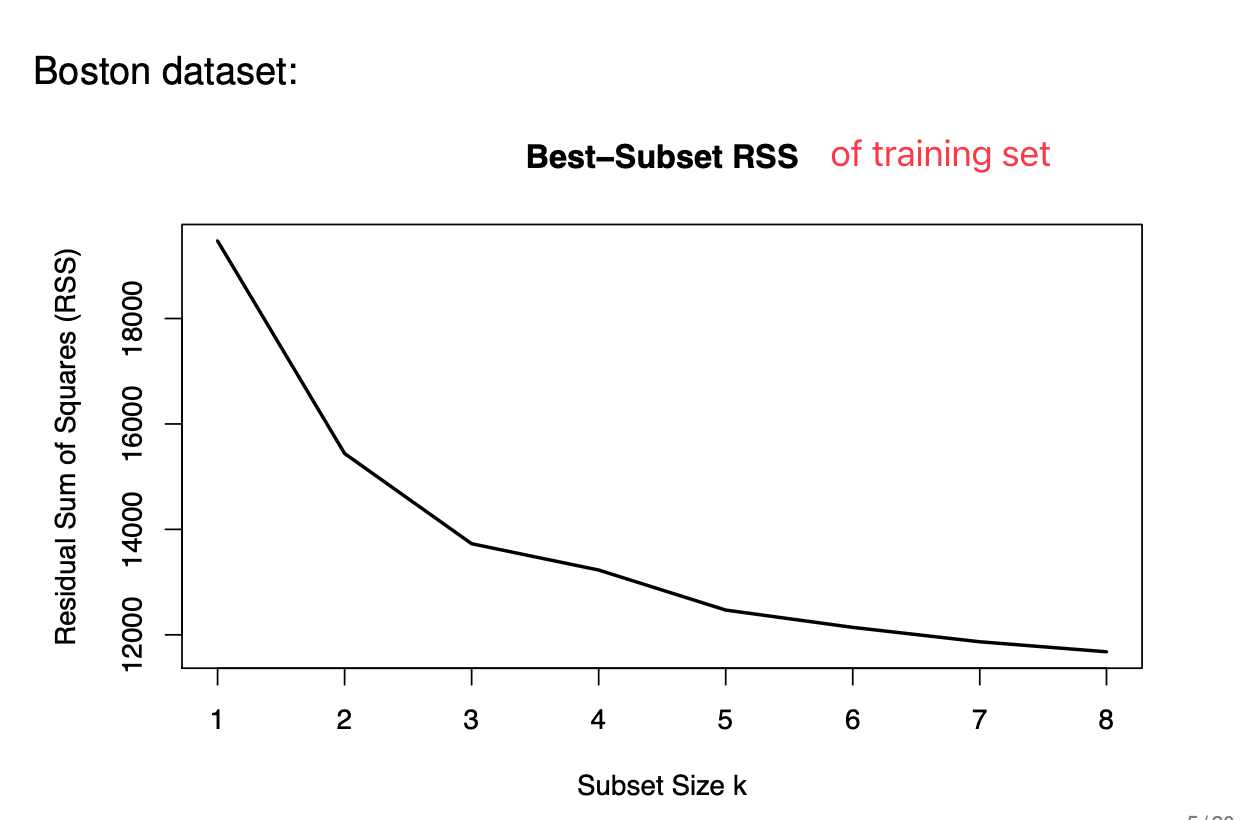

## step-wise selection

stepwise selection are **more computationally feasible** than best-subset selection,

bc they don't need to iterate thru all the models ($2^p$)

but they **can't guarantee to find the best subset** of $p$ predictors 

but, there are lots of paper proof stepwise selection is robust

### forward stepwise selection

recall Boosting "Forward stagewise additive modeling"

can think Boosting as a type of linear regression model,

where **features are all possible weak learners**

algorithm:

start from null model $M_0$, build an increasing seq of **nested models**

1. fit $M_0$

2. for $k=1,2,...,p$, pick a best predictor that has smallest training error from the $p-k+1$ remaining unused predictors, add to $M_{k-1}$

3. pick the best model among $𝑀_0,𝑀_1,...,𝑀_𝑝$ that has smallest validation error

### backward stepwise selection

algorithm:

start from full model $M_p$, build an decreasing seq of **nested models**

1. fit $M_p$


2. for $k=p-1,p-2,...,0$, pick a **worst** predictor has largest training error, remove from $M_{k+1}$, call the new model $M_{k}$


3. pick the best model among $𝑀_0,𝑀_1,...,𝑀_𝑝$ that has smallest validation error

### bidirectional stepwise selection

- used for high-dimensional space

    e.g., $n=100, p=1,000,000$, obviously a full model is useless

- design matrix $X$ may not have full rank, thus OLS solutions may not be unique

Algorithm:

1. start from null model $M_0$ or full model $M_p$

2. for each step, can add or remove a predictor

3. stop when validation error no further decrease


Note

1. will eventually stop coz the number of possible models are finite and validation error must be reduced

3. could run for > $O(p)$ steps

## scoring metrics for final step


- training error RSS and $R^2$ is a bad metric

    coz big model that has large number of predictors has advantage
    
    
- cross-validated MSE is a good criterion, but cross validation is time consuming


- other options: choose model has smallest scores

    - linear regression only: Mallow's $C_p$
    
    - regression/classification: AIC, BIC
    
   these options are based on penalty like regularization,
    
   often used for regression model (linear, logistic)
    
   use penalty to account for the **additional error** by adding more features, can find out if improvement come from **overfitting to noise or actual signal gain**

### Mallow's $C_p$

select model with smallest $C_p$

$$
C_p = \frac{1}{n} \left( RSS + 2p \hat \sigma^2 \right)
$$

where $C_p$ is score of reduced $\text{model}_p$

RSS is residual sum of square of reduced $model_p$

**penalty** $2p \hat \sigma^2$ depends on # of features $p$ fitted in the model and estimated error variance $\hat \sigma^2$, i.e. residual sum of square of full model

$$
\hat \sigma^2 = RSS_{full} = \frac{1}{n}\sum_{i=1}^n (y_i - \hat y_i)^2_{full}
$$

#### derivation

$$
C_p=MSE_{OOS} = MSE_{IS}+\frac{2p}{n} \sigma^2
$$

where $MSE_{OOS}$ is out-of-sample MSE (mean square error), $MSE_{IS}$ is in-sample MSE

assume we have data $(X, Y)$, $X \in \mathbb{R}^{n \times p}$, $Y \in \mathbb{R}^{n}$

fitted linear regression model is 

$$
\hat Y = X \hat \beta
$$

where $X$ is fixed, the randomness of $\hat \beta$ just come from noise

train error $MSE_{IS}$ (in-sample MSE) is calculated from the original data $(X, Y)$ ($Y$ is the true label)

$$
MSE_{IS} = \mathbb{E} \left[ \frac{1}{n} \sum_{i=1}^n ({Y_i} - \hat Y_i)^2 \right]
$$

test error $MSE_{OOS}$ (out-of-sample MSE) is calculated from the new data $(X, \tilde{Y})$ ($\tilde{Y}$ is the true label)

$$
MSE_{OOS} = \mathbb{E} \left[ \frac{1}{n} \sum_{i=1}^n (\tilde{Y_i} - \hat Y_i)^2 \right]
$$



we want to link $MSE_{OOS}$ with $MSE_{IS}$, i.e. 

$$
MSE_{OOS} = MSE_{IS} + adjustment
$$

so we decompose $MSE_{OOS}$

- since $\frac{1}{n} \sum_{i=1}^n$ is scalar, for convenience, we only focus on the the $i$ th iterm $E(\tilde{Y_i} - \hat Y_i)^2$ in the summation  of $MSE_{OOS}$

since $Var(X) = E(X^2) - [E(X)]^2$, Then $E(X^2) = Var(X) + [E(X)]^2$

Then $E(\tilde{Y_i} - \hat Y_i)^2$ can be decomposed as

$$
E(\tilde{Y_i} - \hat Y_i)^2 = Var(\tilde{Y_i} - \hat Y_i) + [E(\tilde{Y_i} - \hat Y_i)]^2
$$

Since $Var(A,B) = Var(A)+Var(B)-2Cov(A,B)$ and the linearity of expectation

$$
E(\tilde{Y_i} - \hat Y_i)^2 = Var(\tilde{Y_i})+ Var(\hat Y_i)-2Cov(\tilde{Y_i} , \hat Y_i) + [E(\tilde{Y_i} - \hat Y_i)]^2 \\[1em]
= Var(\tilde{Y_i})+ Var(\hat Y_i)-2Cov(\tilde{Y_i} , \hat Y_i) + [E(\tilde{Y_i}) - E(\hat Y_i)]^2 
$$

Since $\tilde{Y_i}$ and $\hat Y_i$ are independent, then $Cov(\tilde{Y_i} , \hat Y_i)=0$

then 

$$E(\tilde{Y_i} - \hat Y_i)^2 = Var(\tilde{Y_i})+ Var(\hat Y_i)+ [E(\tilde{Y_i} - \hat Y_i)]^2$$

- the same as $MSE_{OOS}$, we only focus on $i$ th iterm $E(Y_i - \hat Y_i)^2$  in the summation of $MSE_{IS}$

since $Var(X) = E(X^2) - [E(X)]^2$, Then $E(X^2) = Var(X) + [E(X)]^2$

Then $E(Y_i - \hat Y_i)^2$ can be decomposed as

$$
E(Y_i - \hat Y_i)^2 = Var({Y_i} - \hat Y_i) + [E({Y_i} - \hat Y_i)]^2
$$

Since $Var(A,B) = Var(A)+Var(B)-2Cov(A,B)$

$$
E({Y_i} - \hat Y_i)^2 = Var({Y_i})+ Var(\hat Y_i)-2Cov({Y_i} , \hat Y_i) + [E({Y_i} - \hat Y_i)]^2
$$

Note $Y_i$ and $\hat Y_i$ are **dependent** coz we train on $Y_i$ to get $\hat Y_i$, thus $Cov({Y_i} , \hat Y_i) \neq 0$

we can show that $\sum Cov({Y_i} , \hat Y_i) = \sigma^2 p$

$Y_i$ and $\tilde Y_i$ are independent, have same distribution, $E(Y_i) = E(\tilde Y_i), Var(Y_i) = Var(\tilde Y_i)$

since $E(\tilde{Y_i} - \hat Y_i)^2 = Var(\tilde{Y_i})+ Var(\hat Y_i)+ [E(\tilde{Y_i}) - E(\hat Y_i)]^2 $

plug in $E(\tilde Y_i) = E(Y_i) , Var(\tilde Y_i)=Var(Y_i) $

$$E(\tilde{Y_i} - \hat Y_i)^2 = Var({Y_i})+ Var(\hat Y_i)+ [E({Y_i}) - E(\hat Y_i)]^2 $$

since from $MSE_{IS}$ we have $
E({Y_i} - \hat Y_i)^2 = Var({Y_i})+ Var(\hat Y_i)-2Cov({Y_i} , \hat Y_i) + [E({Y_i} - \hat Y_i)]^2
$

then $Var({Y_i})+ Var(\hat Y_i) = E({Y_i} - \hat Y_i)^2 + 2Cov({Y_i} , \hat Y_i) - [E({Y_i} - \hat Y_i)]^2$

plug in above to $E(\tilde{Y_i} - \hat Y_i)^2$

then $E(\tilde{Y_i} - \hat Y_i)^2 =E({Y_i} - \hat Y_i)^2 + 2Cov({Y_i} , \hat Y_i)$

then sum over all $i$ and take average

$$
E \left[\frac{1}{n} \sum_{i=1}^n (\tilde{Y_i} - \hat Y_i)^2 \right] = E\left[\frac{1}{n} \sum_{i=1}^n ({Y_i} - \hat Y_i)^2 \right] + \frac{2}{n} \sum_{i=1}^n  Cov({Y_i} , \hat Y_i) = E\left[\frac{1}{n} \sum_{i=1}^n ({Y_i} - \hat Y_i)^2 \right] + \frac{2}{n} \sigma^2 p
$$


that is

$$
C_p = MSE_{OOS}= MSE_{IS} + \frac{2p}{n} \sigma^2
$$

we approximate $MSE_{IS}$ using $\frac{1}{n}RSS$, approximate $\sigma^2$ using $\hat \sigma^2$

then

$$
C_p = \frac{1}{n}RSS +  \frac{2p}{n}\hat \sigma^2
$$

if $\hat \sigma^2$ is an unbiased estimate of $\sigma^2$,

then $C_p$ is an unbiased estimate of test MSE

### AIC (Akaike Info Criterion)

Stat's linear regression model summary automatically generate AIC

used for both regression or classification

$$
AIC = -2\log L + 2p
$$

where $L$ is the likelihood of reduced $model_p$

$p$ is number of predictors in the fitted model

we can show for linear regression, AIC is similar to Mallow's $C_p$

$$
AIC = \frac{1}{n {\color{Red} {\hat \sigma^2 }}} \left( RSS + 2p \hat \sigma^2 \right)
$$

where $-2\log L = \frac{1}{\hat \sigma^2 }RSS + C$  for some constant $C$

### BIC (Bayesian Info Criterion)

used for both regression or classification

$$
BIC = -2\log L + p\ {\color{Red} {\log(n)} }
$$

where $L$ is the likelihood of reduced $model_p$

$p$ is # predictors in the fitted model

$n$ is # sample size

BIC has more penalty both on large # predictors and large sample size

we can show for linear regression, BIC is also similar to Mallow's $C_p$

$$
BIC = \frac{1}{n} \left( RSS + p\  \log(n) {\color{Red} {\hat \sigma^2 }} \right)
$$

### comparison

$
C_p = \frac{1}{n} \left( RSS + 2p \hat \sigma^2 \right)
$

$
AIC = -2\log L + 2p
$

$
BIC = -2\log L + p\ {\color{Red} {\log(n)} }
$

- AIC VS. BIC penalty $2p$ vs. $p \log(n)$

    when $n>7$, **BIC has heavier penalty on number of features, which produce smaller model**


- for linear regression, penalty

    $C_p$: $2p \sigma^2$

    AIC: $2p$ 

    BIC: $p \log(n) \sigma^2 $

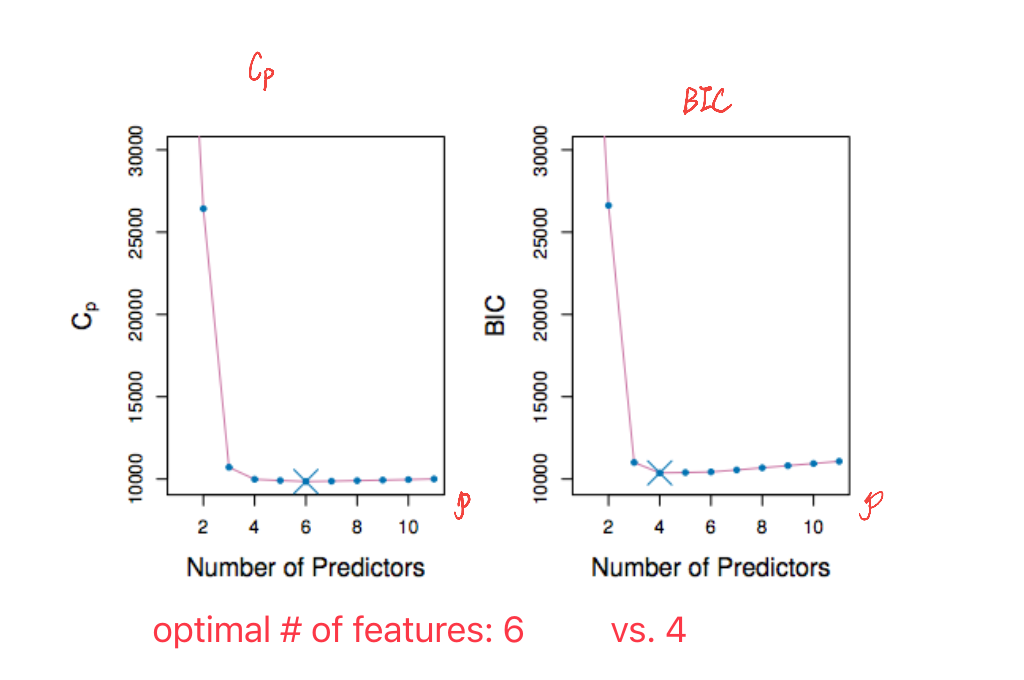